# Rice Classification

### In this project, we will train Rice types. To do this, we will first scan the images in the folder containing the Rice images, then reduce their size and normalize them, and then train them with deep learning.

<a href='https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset' target=_blank>You can find the data file here</a>

<img src=https://i.lezzet.com.tr/images-xxlarge-secondary/en-saglikli-pirinc-turu-nedir-05fbcfc9-1009-412f-a392-4f1fe6fcf9fb.jpg width='400'>

In [1]:
#pip install opencv-python

In [3]:
import cv2
import pandas as pd
import os

In [4]:
labels = ['Arborio','Basmati','Ipsala','Jasmine','Karacadag']
img_path = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/'

In [5]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [6]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [7]:
df.sample(10)

,img,label
73070,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
43809,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
36209,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
52748,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine
3599,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Arborio
38986,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
27395,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati
68958,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
22841,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati
58327,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine


In [8]:
d={'Arborio':0,'Basmati':1,'Ipsala':2,'Jasmine':3,'Karacadag':4}

In [9]:
df['encode_label']=df['label'].map(d)

In [10]:
df.sample(5)

,img,label,encode_label
16512,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati,1
40078,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala,2
1891,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Arborio,0
50086,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine,3
17575,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati,1


In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
image=cv2.imread(str(df['img'][55]))

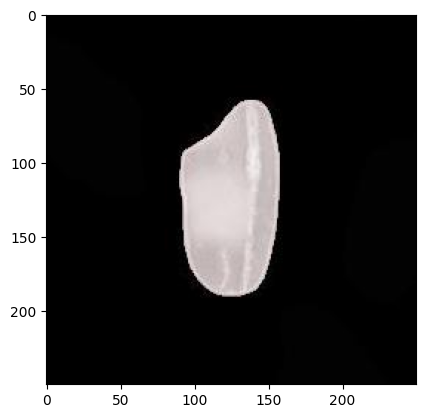

In [14]:
plt.imshow(image);

In [15]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(32,32)) 
    img=img/255.0    
    x.append(img)

In [16]:
x=np.array(x)

In [17]:
x

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [18]:
y=df['encode_label']

In [19]:
y.value_counts()

encode_label
0    15000
1    15000
2    15000
3    15000
4    15000
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

2024-04-07 21:28:20.677552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 21:28:20.677651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 21:28:20.679250: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
model = Sequential()
model.add(Input(shape=(32,32, 3)))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model. add (BatchNormalization ())
model.add(Conv2D(84, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(120, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=3,verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 181s 97ms/step - accuracy: 0.9966 - loss: 0.0112 - val_accuracy: 0.9873 - val_loss: 0.0397
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 98ms/step - accuracy: 0.9973 - loss: 0.0093 - val_accuracy: 0.9893 - val_loss: 0.0452
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 98ms/step - accuracy: 0.9978 - loss: 0.0069 - val_accuracy: 0.9385 - val_loss: 0.3670


In [28]:
loss,accuracy=model.evaluate(x_test,y_test)

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9393 - loss: 0.3574


In [29]:
accuracy

0.9385333061218262

In [30]:
tahmin=model.predict(x_test)

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step


In [31]:
model.save('pirinccesitleri.h5')

In [32]:
import matplotlib.pyplot as plt

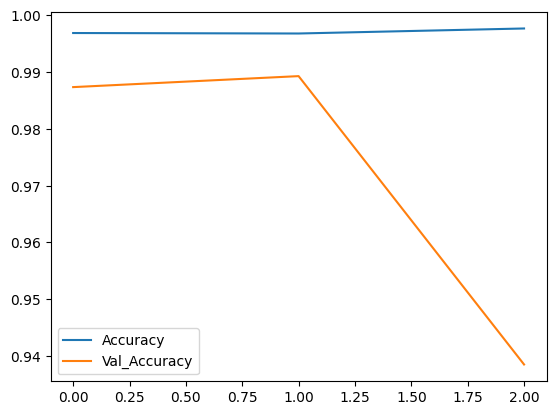

In [33]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [34]:
loss_f=pd.DataFrame(history.history)

<Axes: >

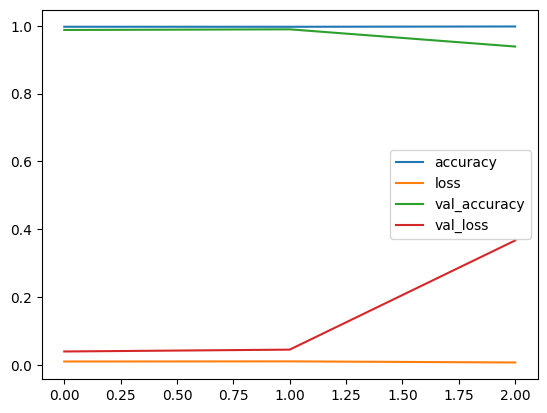

In [35]:
loss_f.plot()

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [37]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[2808,    0,    0,  107,   82],
       [   0, 2816,    0,  179,    0],
       [  12,    0, 2535,  536,    0],
       [   0,    1,    0, 2995,    0],
       [   4,    0,    0,    1, 2924]])

In [38]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

In [39]:
import seaborn as sns

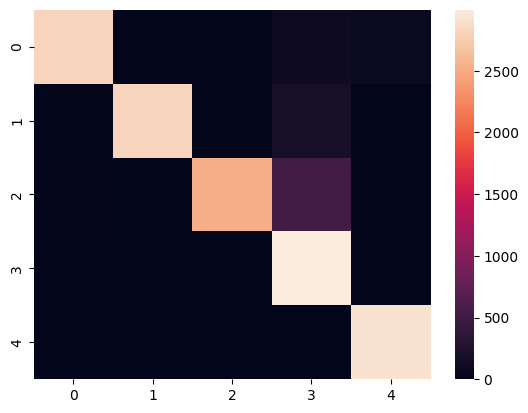

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [41]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2997
           1       1.00      0.94      0.97      2995
           2       1.00      0.82      0.90      3083
           3       0.78      1.00      0.88      2996
           4       0.97      1.00      0.99      2929

    accuracy                           0.94     15000
   macro avg       0.95      0.94      0.94     15000
weighted avg       0.95      0.94      0.94     15000



### Here in Deeplearning we got accuracy: 0.9393 - loss: 0.3574